# Explore here

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller




In [ ]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)


In [3]:
display(df.head())

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df.describe()


,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

date     0
sales    0
dtype: int64

In [11]:
df.isna().sum()

date     0
sales    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.set_index('date', inplace=True)
df = df.sort_index()


In [8]:
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


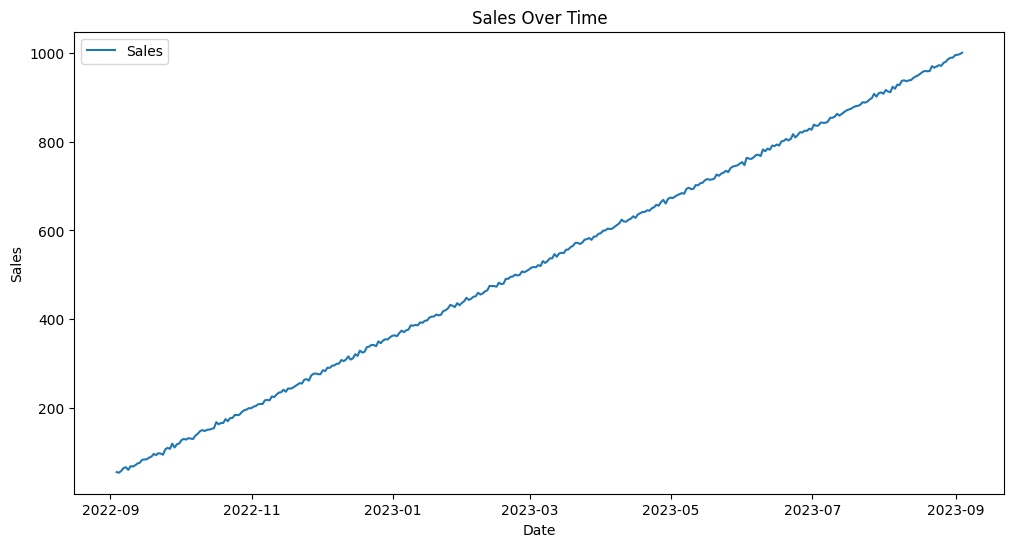

In [9]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:

# Perform ADF test on original 'sales' data
adf_result = adfuller(df['sales'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: 0.5454141937063646
p-value: 0.986189981531106


In [13]:
# Difference the 'sales' data to make it stationary
df['sales_diff'] = df['sales'].diff()

# Drop the NaN values resulting from differencing
df_diff = df['sales_diff'].dropna()


In [14]:
# Perform ADF test on differenced data
adf_result_diff = adfuller(df_diff)
print(f'ADF Statistic (Differenced): {adf_result_diff[0]}')
print(f'p-value (Differenced): {adf_result_diff[1]}')


ADF Statistic (Differenced): -9.430263118334732
p-value (Differenced): 5.212954111417291e-16


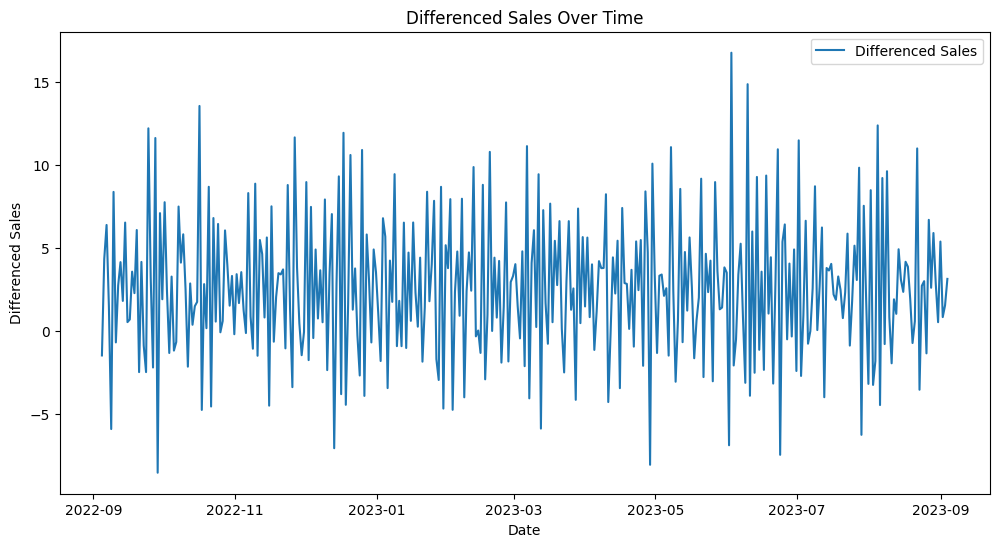

In [16]:
# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='Differenced Sales')
plt.title('Differenced Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()


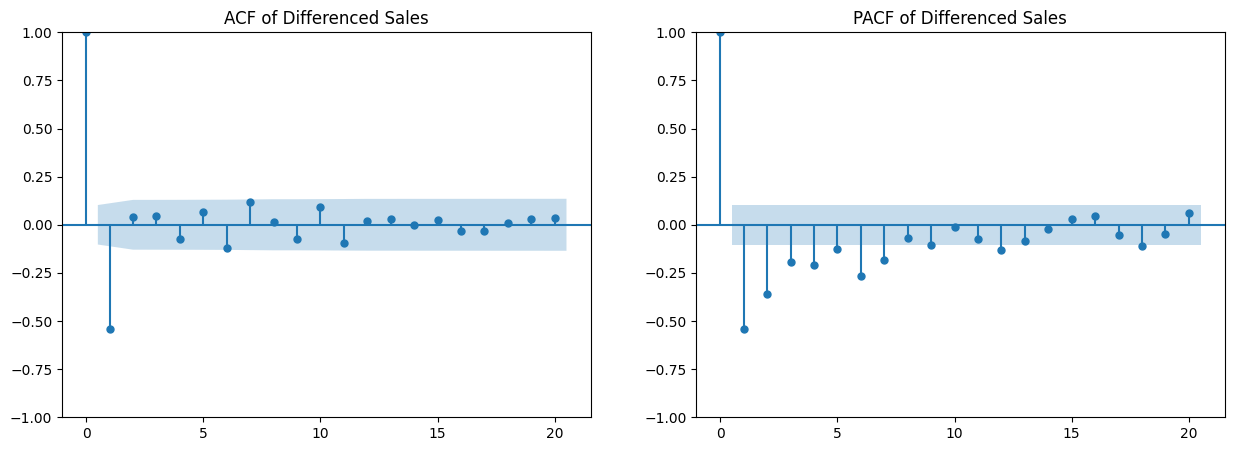

In [ ]:

# Plot ACF and PACF of the differenced data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(df_diff, lags=20, ax=axes[0])
axes[0].set_title('ACF of Differenced Sales')

# Plot PACF
plot_pacf(df_diff, lags=20, ax=axes[1])
axes[1].set_title('PACF of Differenced Sales')

plt.show()


In [19]:
df.index.to_series().diff().unique()

<TimedeltaArray>
[NaT, '1 days']
Length: 2, dtype: timedelta64[ns]

In [18]:
# Define the size of the training set
train_size = int(len(df) * 0.9)

# Split the data
train = df.iloc[:train_size]['sales']
test = df.iloc[train_size:]['sales']


In [30]:
# Define the ARIMA model
model = ARIMA(train, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  329
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -944.467
Date:                Thu, 14 Nov 2024   AIC                           1894.933
Time:                        19:15:51   BIC                           1906.312
Sample:                    09-03-2022   HQIC                          1899.473
                         - 07-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    581.154      0.000       0.997       1.003
ma.L1         -0.9994      1.046     -0.955      0.339      -3.050       1.051
sigma2        18.3045     19.177      0.955      0.3

c:\Users\aless\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\aless\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\aless\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
forecast = model_fit.forecast(steps=len(test))


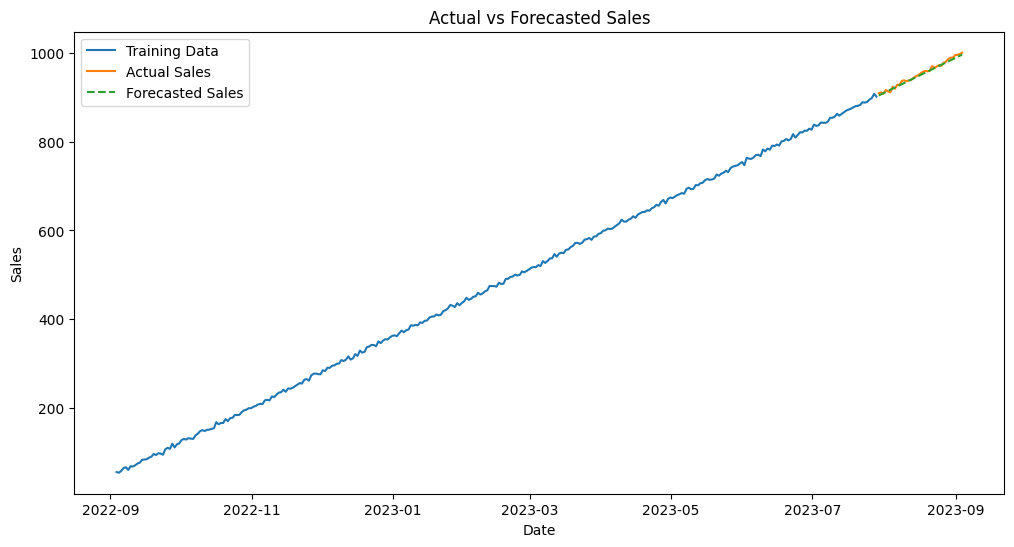

In [32]:
# Plot the forecasted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [33]:


# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 14.582035419038085
Root Mean Squared Error: 3.8186431384770803
